In [83]:
!pip install openpyxl

cleaning data in p/e and corrsoponding to returns

In [2]:
#Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load the Excel file
file_path = 'Stock_Screening_CFG v2.xlsx'
pe_df = pd.read_excel(file_path, sheet_name='PE')
returns_df = pd.read_excel(file_path, sheet_name='Returns')

# Step 3: Define threshold for removing columns (50% of rows)
threshold = 0.5 * len(pe_df)

# Step 4: Identify columns to drop in PE with >50% zeros or NaNs
zero_na_counts = (pe_df.iloc[:, 1:] == 0).sum() + pe_df.iloc[:, 1:].isna().sum()
columns_to_drop = zero_na_counts[zero_na_counts > threshold].index.tolist()



# Convert Date to datetime and remove time part
pe_df['Date'] = pd.to_datetime(pe_df['Date']).dt.date

# Step 5: Drop those columns from both PE and Returns
pe_cleaned = pe_df.drop(columns=columns_to_drop)
returns_cleaned = returns_df.drop(columns=columns_to_drop)

# Step 6: Save cleaned data to a new Excel file
output_file = 'Cleaned_PE_Returns.xlsx'
with pd.ExcelWriter(output_file) as writer:
    pe_cleaned.to_excel(writer, sheet_name='Cleaned_PE', index=False)
    returns_cleaned.to_excel(writer, sheet_name='Cleaned_Returns', index=False)

print(f"Cleaned data saved to {output_file}")


Cleaned data saved to Cleaned_PE_Returns.xlsx


how the P/E ratio affects returns for the top companies

In [4]:
import pandas as pd

# Step 1: Load the cleaned Excel file
file_path = 'Cleaned_PE_Returns.xlsx'  # Update path if needed
pe_df = pd.read_excel(file_path, sheet_name='Cleaned_PE')
returns_df = pd.read_excel(file_path, sheet_name='Cleaned_Returns')

# Step 2: Preview the data to ensure it's loaded correctly
print(pe_df.head())
print(returns_df.head())


        Date  NasdaqGS:MSFT  NasdaqGS:AAPL  NasdaqGS:NVDA NasdaqGS:AMZN  \
0 2024-07-20       34.60065       32.32971       40.35382      38.40814   
1 2024-06-30       35.34934       30.62450       42.49157       40.4712   
2 2024-05-31       32.81349       28.18584       37.94711      37.03144   
3 2024-04-30       30.71831       25.63512       34.47516      40.94812   
4 2024-03-31       34.50901       25.67104       36.37828      43.64067   

   NasdaqGS:GOOGL  NasdaqGS:META  NasdaqGS:AVGO NasdaqGS:TSLA  NYSE:LLY  ...  \
0        22.86545       23.16640       28.70617      83.72419  58.36782  ...   
1        23.52994       24.72927       29.23185      70.90186  61.54359  ...   
2        22.25290       22.94321       26.42040      64.16604  55.77281  ...   
3        21.00685       21.18448       25.83951      65.77899  55.79963  ...   
4        22.22497       24.30443       26.35429      58.94286  62.39393  ...   

   NYSE:PAYC  NYSE:FMC  NYSE:IVZ  NYSE:DVA  NasdaqGS:AAL  NYSE:MHK  

In [4]:
# inspecting data
print("P/E Data Columns:", pe_df.columns)
print("Returns Data Columns:", returns_df.columns)

print(pe_df.isnull().sum())
print(returns_df.isnull().sum())

P/E Data Columns: Index(['Date', 'NasdaqGS:MSFT', 'NasdaqGS:AAPL', 'NasdaqGS:NVDA',
       'NasdaqGS:AMZN', 'NasdaqGS:GOOGL', 'NasdaqGS:META', 'NasdaqGS:AVGO',
       'NasdaqGS:TSLA', 'NYSE:LLY',
       ...
       'NYSE:PAYC', 'NYSE:FMC', 'NYSE:IVZ', 'NYSE:DVA', 'NasdaqGS:AAL',
       'NYSE:MHK', 'NYSE:BEN', 'NYSE:RL', 'NYSE:BIO', 'NasdaqGS:PARA'],
      dtype='object', length=485)
Returns Data Columns: Index(['Date', 'NasdaqGS:MSFT', 'NasdaqGS:AAPL', 'NasdaqGS:NVDA',
       'NasdaqGS:AMZN', 'NasdaqGS:GOOGL', 'NasdaqGS:META', 'NasdaqGS:AVGO',
       'NasdaqGS:TSLA', 'NYSE:LLY',
       ...
       'NYSE:PAYC', 'NYSE:FMC', 'NYSE:IVZ', 'NYSE:DVA', 'NasdaqGS:AAL',
       'NYSE:MHK', 'NYSE:BEN', 'NYSE:RL', 'NYSE:BIO', 'NasdaqGS:PARA'],
      dtype='object', length=485)
Date             0
NasdaqGS:MSFT    0
NasdaqGS:AAPL    0
NasdaqGS:NVDA    0
NasdaqGS:AMZN    0
                ..
NYSE:MHK         0
NYSE:BEN         0
NYSE:RL          0
NYSE:BIO         0
NasdaqGS:PARA    0
Length: 485, dtyp

In [5]:
# Reshape PE and Returns data to long format
pe_long = pe_df.melt(id_vars='Date', var_name='Stock', value_name='PE_Ratio')
returns_long = returns_df.melt(id_vars='Date', var_name='Stock', value_name='Return')

# Preview the reshaped data
print(pe_long.head())
print(returns_long.head())


        Date          Stock  PE_Ratio
0 2024-07-20  NasdaqGS:MSFT  34.60065
1 2024-06-30  NasdaqGS:MSFT  35.34934
2 2024-05-31  NasdaqGS:MSFT  32.81349
3 2024-04-30  NasdaqGS:MSFT  30.71831
4 2024-03-31  NasdaqGS:MSFT  34.50901
        Date          Stock    Return
0 2024-07-20  NasdaqGS:MSFT -0.022016
1 2024-06-30  NasdaqGS:MSFT  0.076651
2 2024-05-31  NasdaqGS:MSFT  0.066268
3 2024-04-30  NasdaqGS:MSFT -0.074610
4 2024-03-31  NasdaqGS:MSFT  0.017116


In [6]:

import numpy as np

# Merge the P/E and Returns dataframes on 'Date' and 'Stock'
merged_df = pd.merge(pe_long, returns_long, on=['Date', 'Stock'])

# Replace "NM" with NaN, convert to numeric (coercing errors), then fill NaNs with 0
merged_df['PE_Ratio'] = merged_df['PE_Ratio'].replace('NM', 0)
merged_df['PE_Ratio'] = pd.to_numeric(merged_df['PE_Ratio'], errors='coerce').fillna(0)
merged_df['Return'] = pd.to_numeric(merged_df['Return'], errors='coerce').fillna(0)


# Preview the cleaned merged data
print(merged_df.head())



        Date          Stock  PE_Ratio    Return
0 2024-07-20  NasdaqGS:MSFT  34.60065 -0.022016
1 2024-06-30  NasdaqGS:MSFT  35.34934  0.076651
2 2024-05-31  NasdaqGS:MSFT  32.81349  0.066268
3 2024-04-30  NasdaqGS:MSFT  30.71831 -0.074610
4 2024-03-31  NasdaqGS:MSFT  34.50901  0.017116


C:\Users\HP\AppData\Local\Temp\ipykernel_15100\1456068270.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df['PE_Ratio'] = merged_df['PE_Ratio'].replace('NM', 0)


 Visualize P/E Ratios Over Time (for each stock)


Visualize returns over time for each stock

In [8]:
sector_leaders = {
    'NasdaqGS:AAPL': 'Apple (Info Tech)',
    'NasdaqGS:GOOGL': 'Alphabet (Communication)',
    'NasdaqGS:AMZN': 'Amazon (Consumer Discretionary)',
    'NYSE:JPM': 'JPMorgan (Financials)',
    'NYSE:XOM': 'ExxonMobil (Energy)',
    'NYSE:JNJ': 'Johnson & Johnson (Health Care)',
    'NYSE:UNH': 'UnitedHealth (Health Care)',
    'NYSE:HD': 'Home Depot (Consumer Discretionary)',
    'NYSE:PG': 'Procter & Gamble (Consumer Staples)',
    'NYSE:CAT': 'Caterpillar (Industrials)',
}

# Filter merged data for sector leaders
sector_df = merged_df[merged_df['Stock'].isin(sector_leaders.keys())]
sector_df['Company'] = sector_df['Stock'].map(sector_leaders)

C:\Users\HP\AppData\Local\Temp\ipykernel_15100\1166416029.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_df['Company'] = sector_df['Stock'].map(sector_leaders)


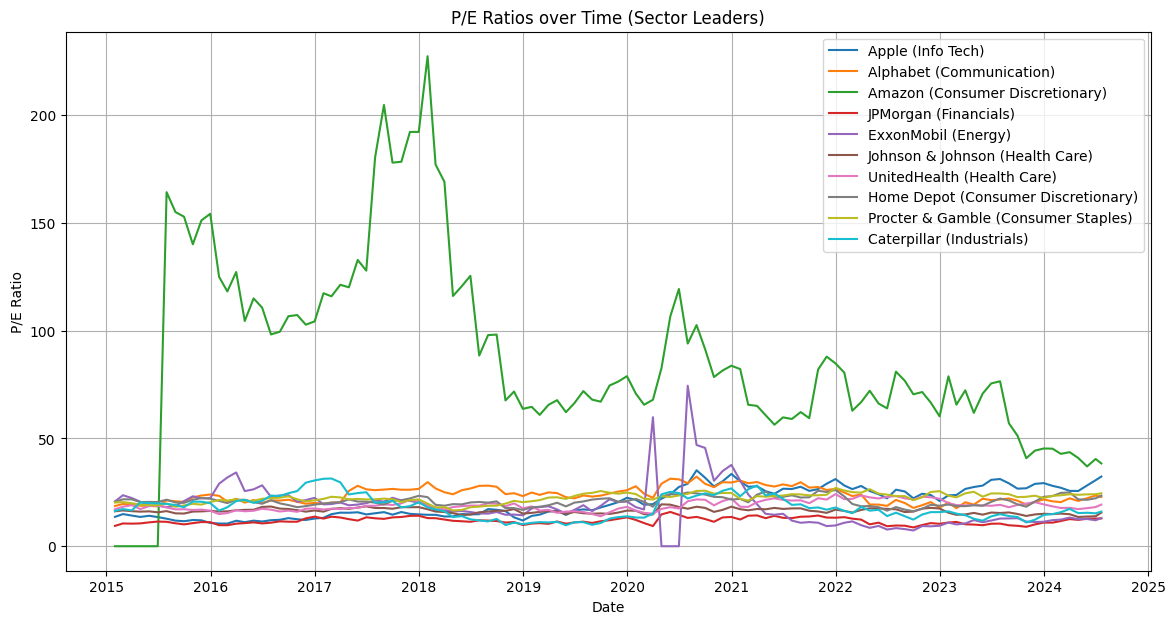

In [9]:

# P/E Ratio over time for sector leaders
plt.figure(figsize=(14,7))
for stock in sector_leaders.keys():
    subset = sector_df[sector_df['Stock']==stock]
    plt.plot(subset['Date'], subset['PE_Ratio'], label=sector_leaders[stock])

plt.title('P/E Ratios over Time (Sector Leaders)')
plt.xlabel('Date')
plt.ylabel('P/E Ratio')
plt.legend()
plt.grid(True)
plt.show()


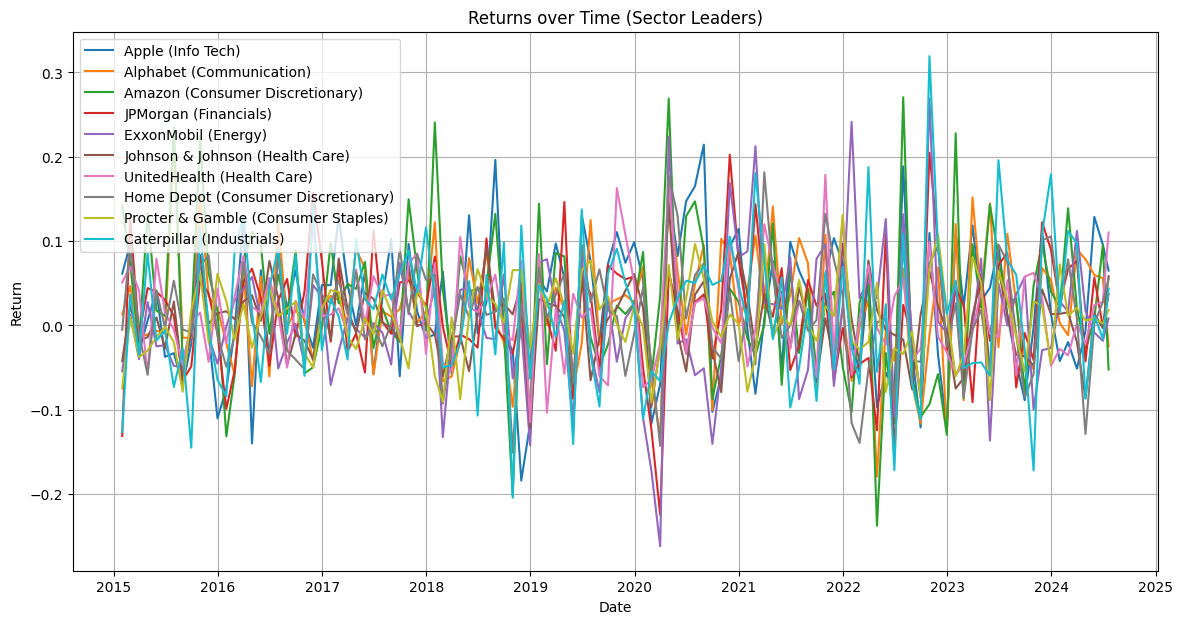

In [11]:
# Returns over time for sector leaders
plt.figure(figsize=(14,7))
for stock in sector_leaders.keys():
    subset = sector_df[sector_df['Stock']==stock]
    plt.plot(subset['Date'], subset['Return'], label=sector_leaders[stock])

plt.title('Returns over Time (Sector Leaders)')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()


### Observations based on industry leading companies:
If you also care about P/E stability, companies like UnitedHealth and Procter & Gamble are very interesting because they don't swing wildly ,you would have seen a more steady relationship in your scatter plots.


Meanwhile, Amazon (AMZN) might show strange behavior ,returns can be high but P/E can be very distorted because of reinvestments.
#### Summary:
- For safe long-term investment → UnitedHealth (UNH) or Procter & Gamble (PG).
- For growth → Apple (AAPL).
- For value stability → JPMorgan (JPM).


In [12]:
# Overall correlation
overall_corr = sector_df['PE_Ratio'].corr(sector_df['Return'])
print(f"\nOverall correlation between PE Ratio and Return: {overall_corr:.4f}")

# Correlation per company
print("\nCorrelation between PE Ratio and Return for each company:")
for stock in sector_leaders.keys():
    subset = sector_df[sector_df['Stock']==stock]
    corr = subset['PE_Ratio'].corr(subset['Return'])
    print(f"{sector_leaders[stock]}: {corr:.4f}")

# --- Step 10: Summary ---
print("\nAnalysis Complete.")


Overall correlation between PE Ratio and Return: 0.0947

Correlation between PE Ratio and Return for each company:
Apple (Info Tech): 0.2031
Alphabet (Communication): 0.2831
Amazon (Consumer Discretionary): 0.1446
JPMorgan (Financials): 0.3103
ExxonMobil (Energy): -0.2055
Johnson & Johnson (Health Care): 0.4050
UnitedHealth (Health Care): 0.2187
Home Depot (Consumer Discretionary): 0.4294
Procter & Gamble (Consumer Staples): 0.2957
Caterpillar (Industrials): 0.2180

Analysis Complete.


- A positive correlation means as P/E ratio increases, returns tend to increase.
- A negative correlation means as P/E ratio increases, returns tend to decrease.
- A correlation close to 0 means little to no relationship.

Visualize P/E vs Return (Scatter Plot)
Now let’s look at the relationship between P/E ratios and Returns. This scatter plot will help you visually inspect the correlation.

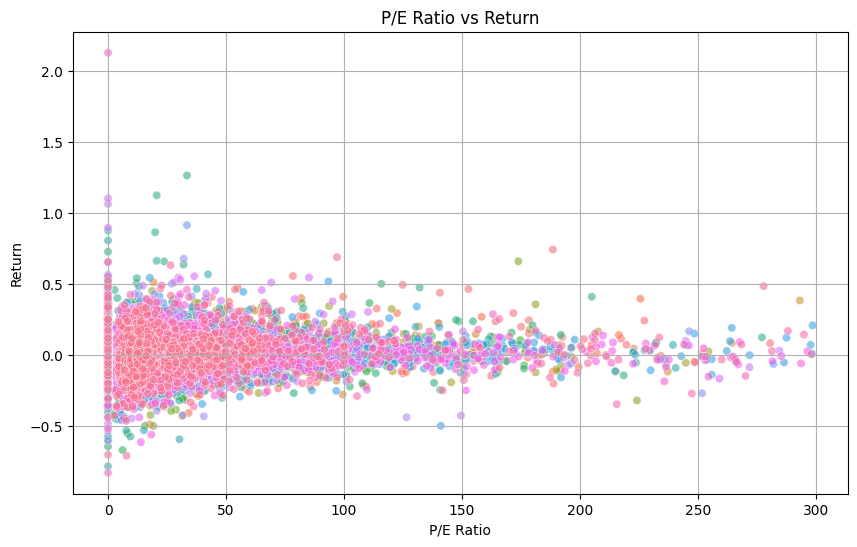

In [13]:
# Scatter plot to visualize the relationship between P/E and Return for selected stocks
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='PE_Ratio', y='Return', hue='Stock', alpha=0.6, legend=False)
plt.title("P/E Ratio vs Return")
plt.xlabel("P/E Ratio")
plt.ylabel("Return")
plt.grid(True)
plt.show()


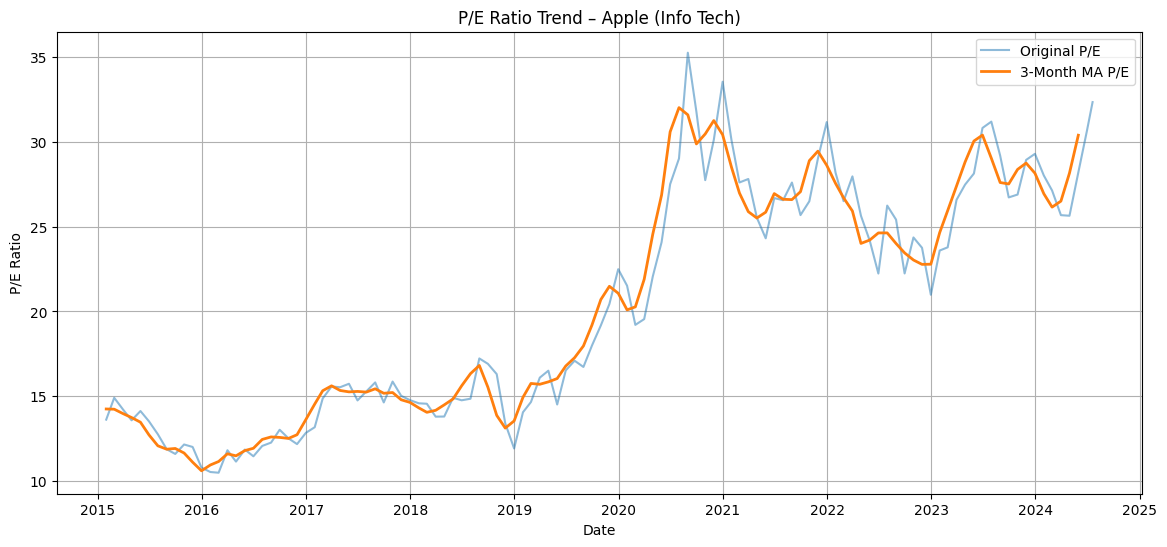

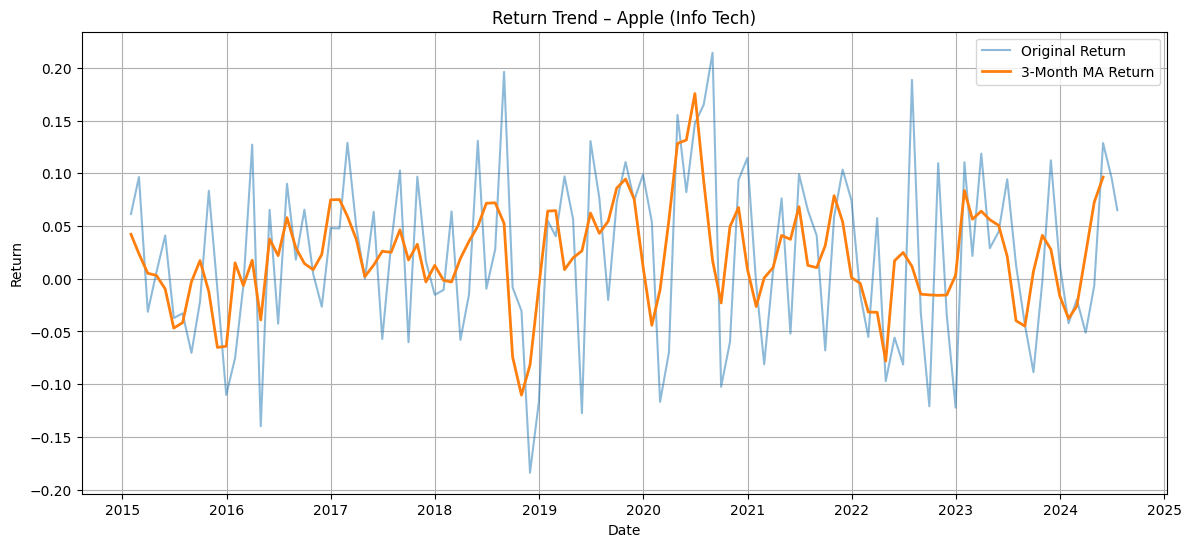

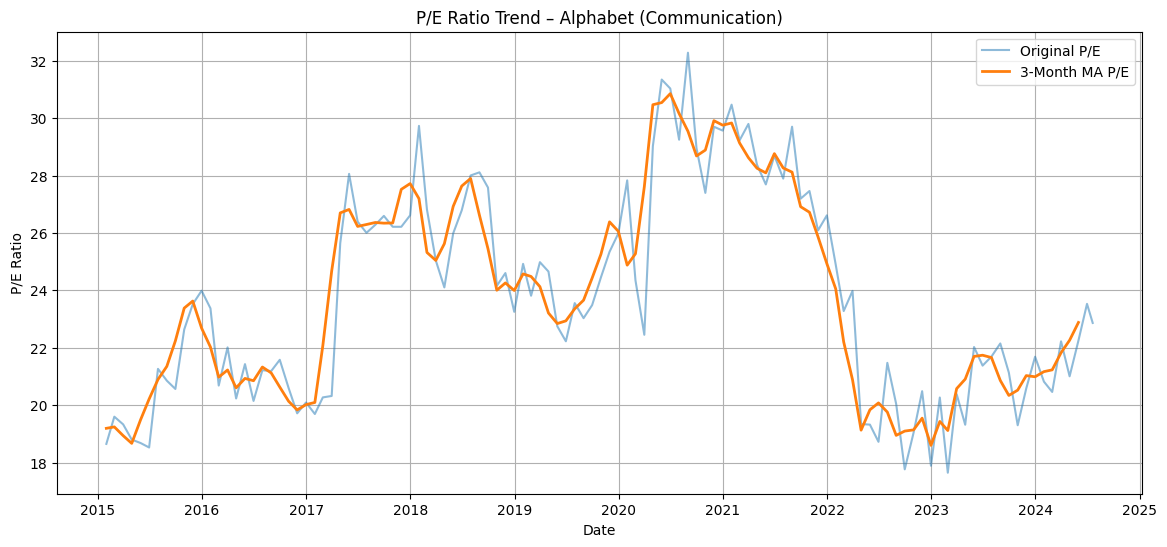

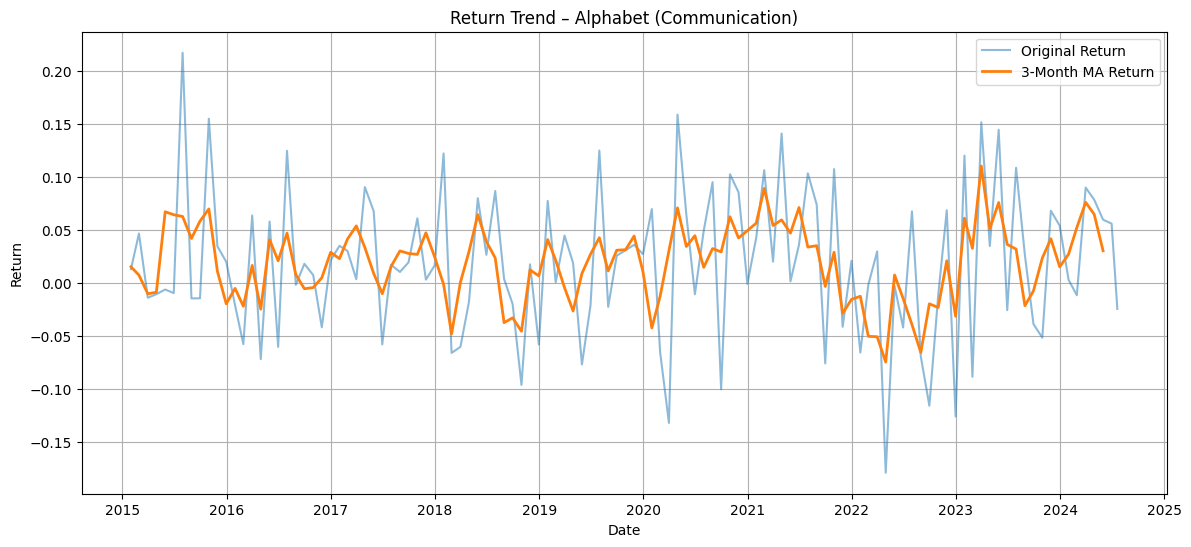

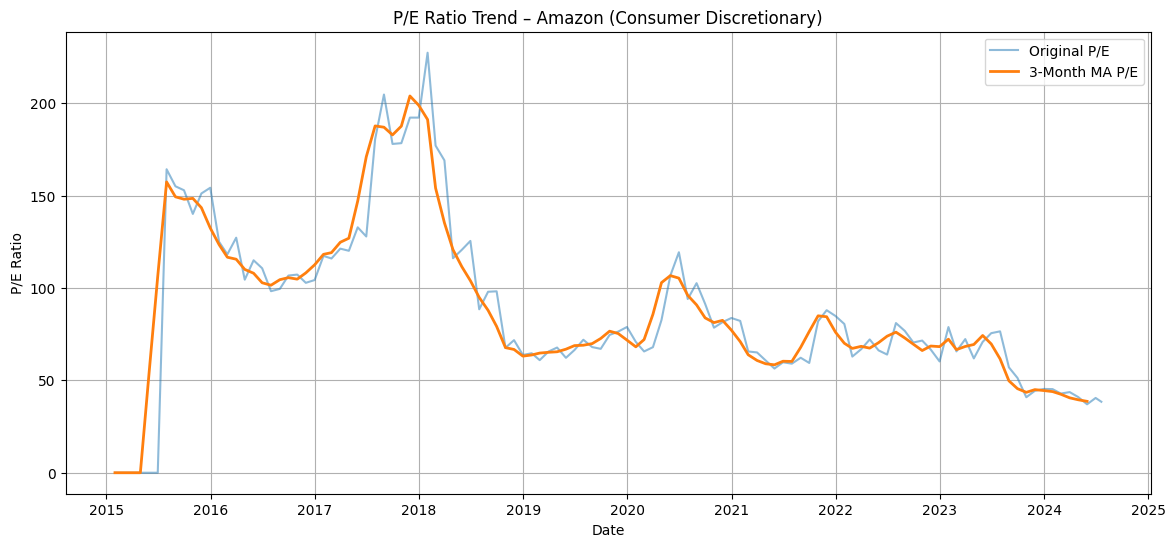

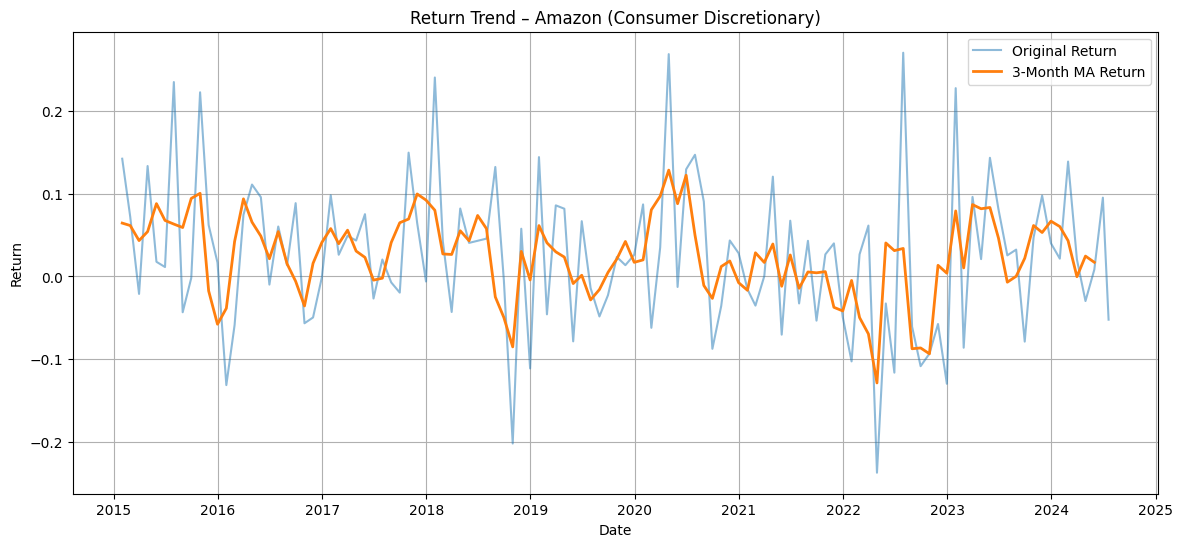

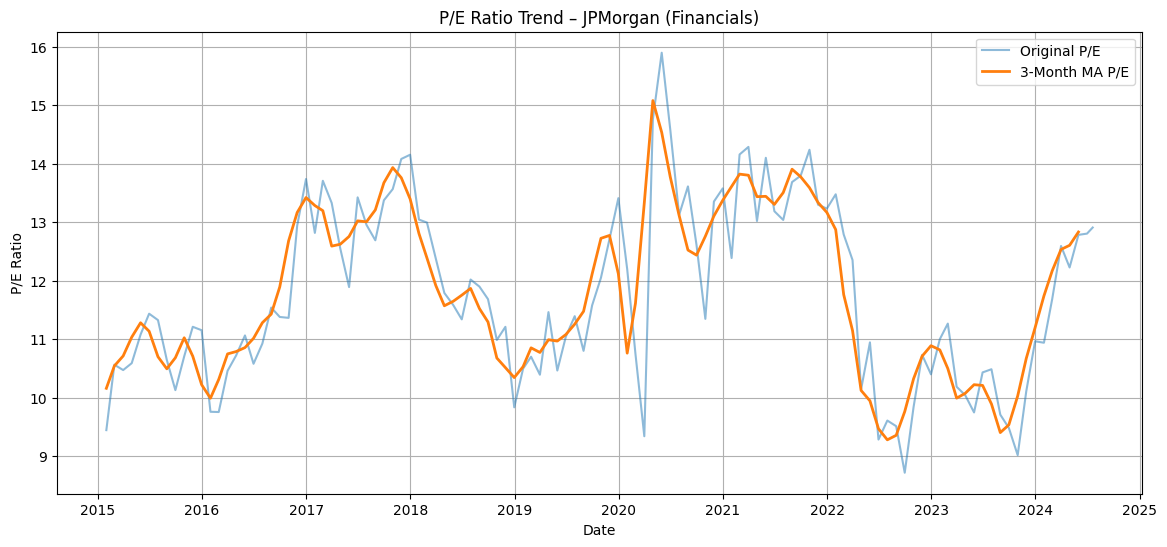

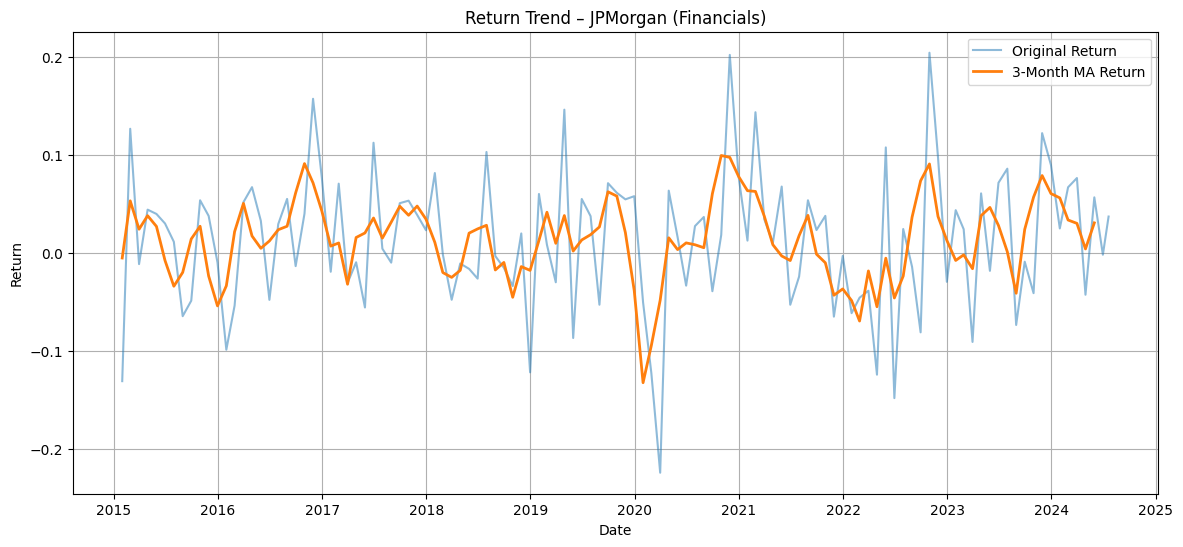

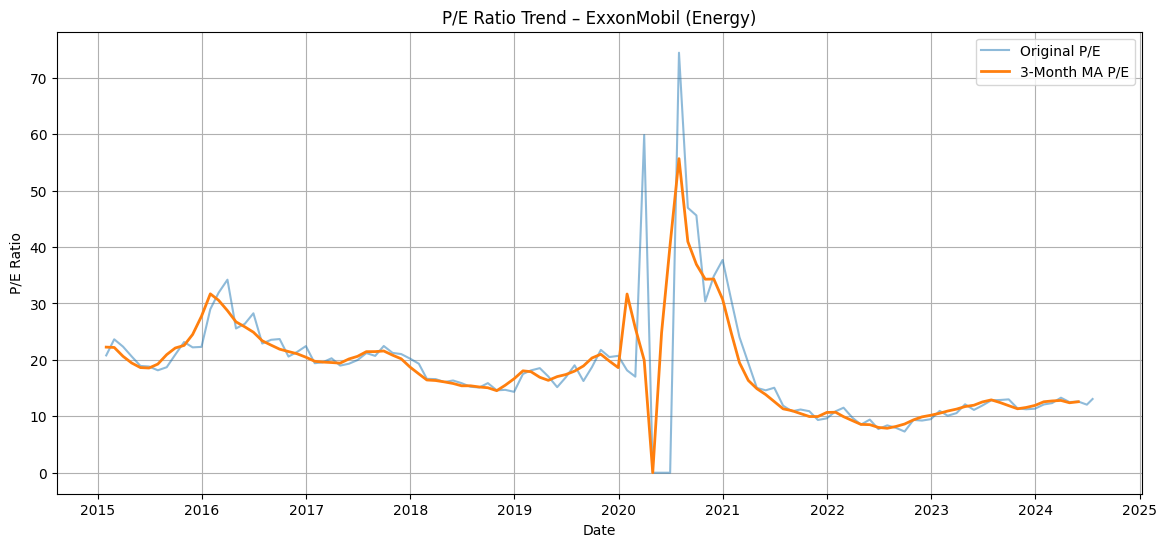

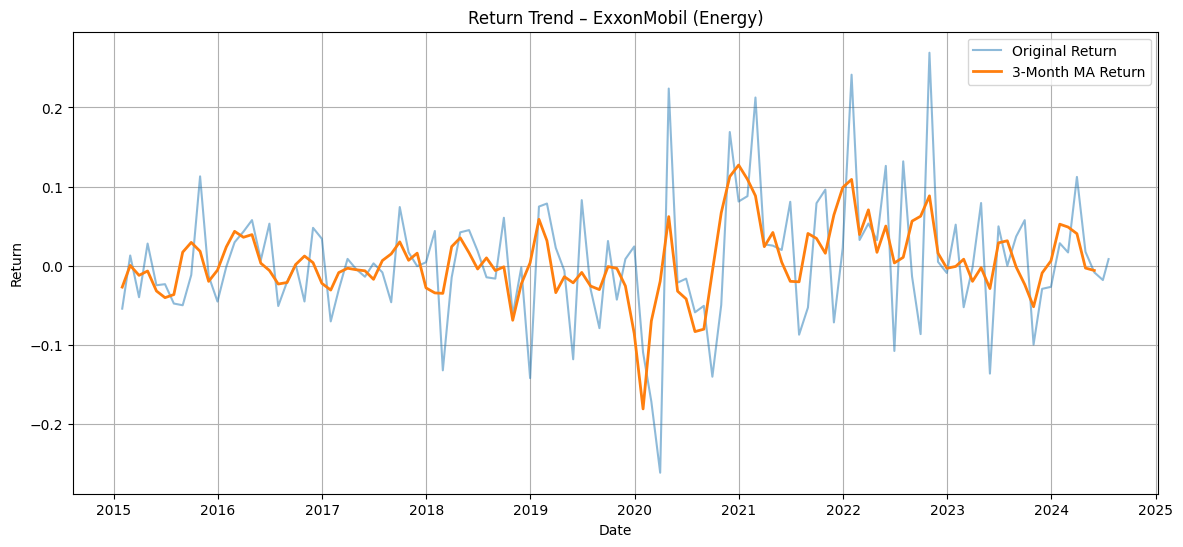

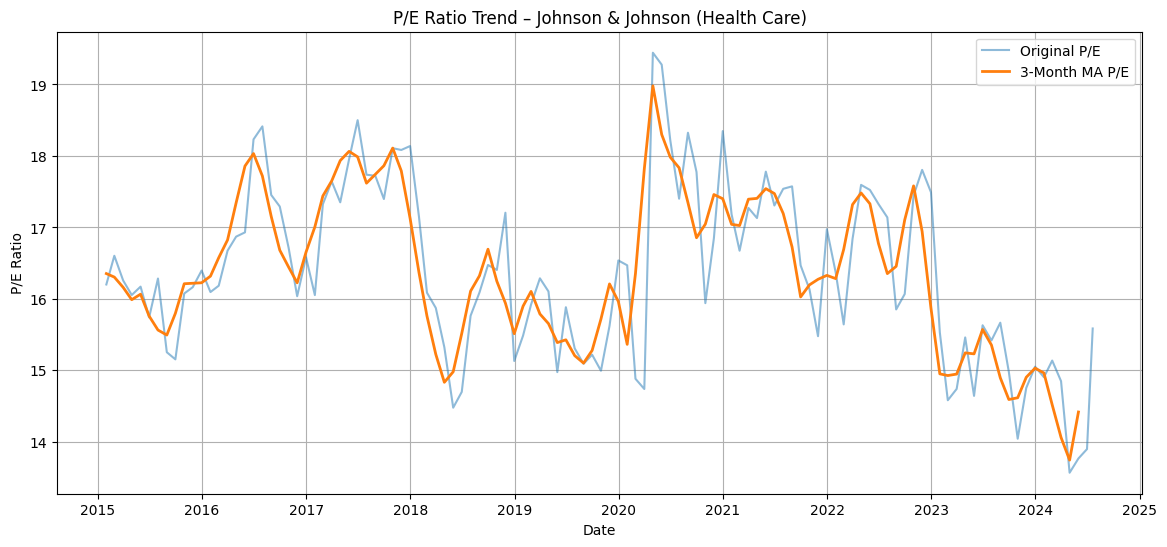

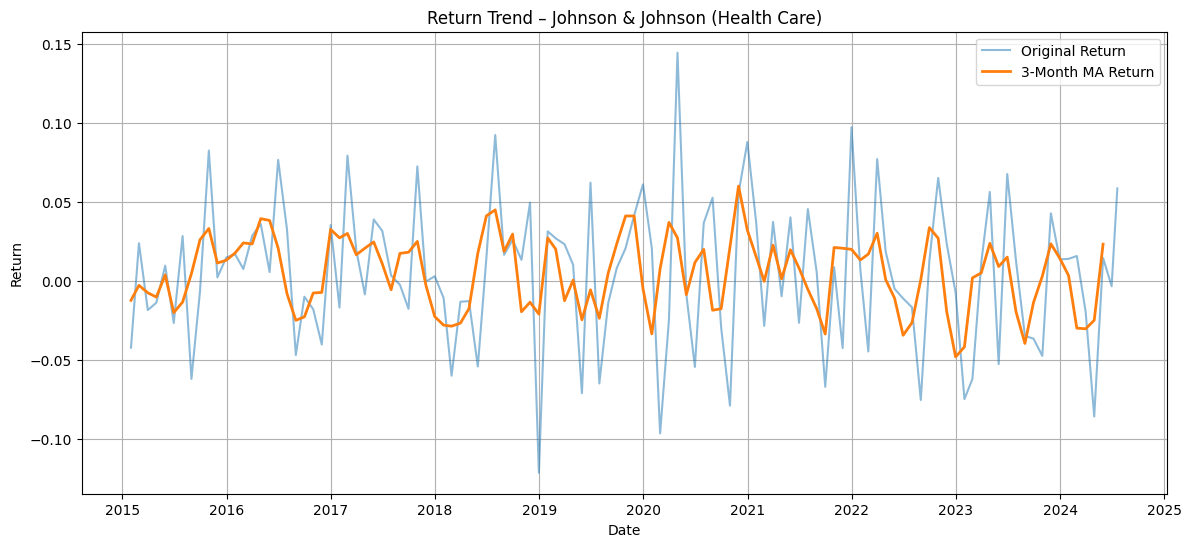

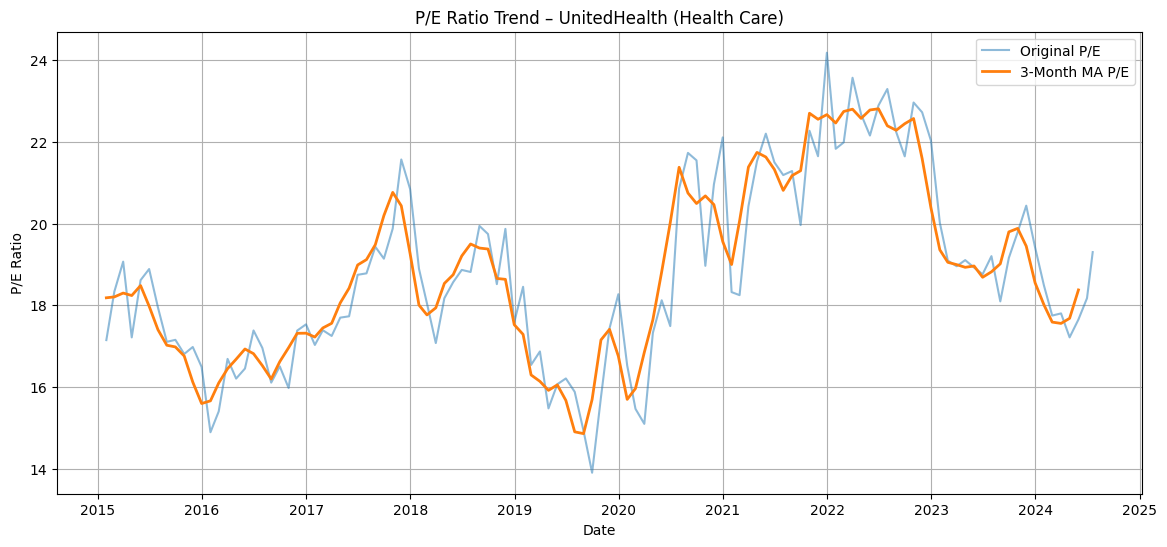

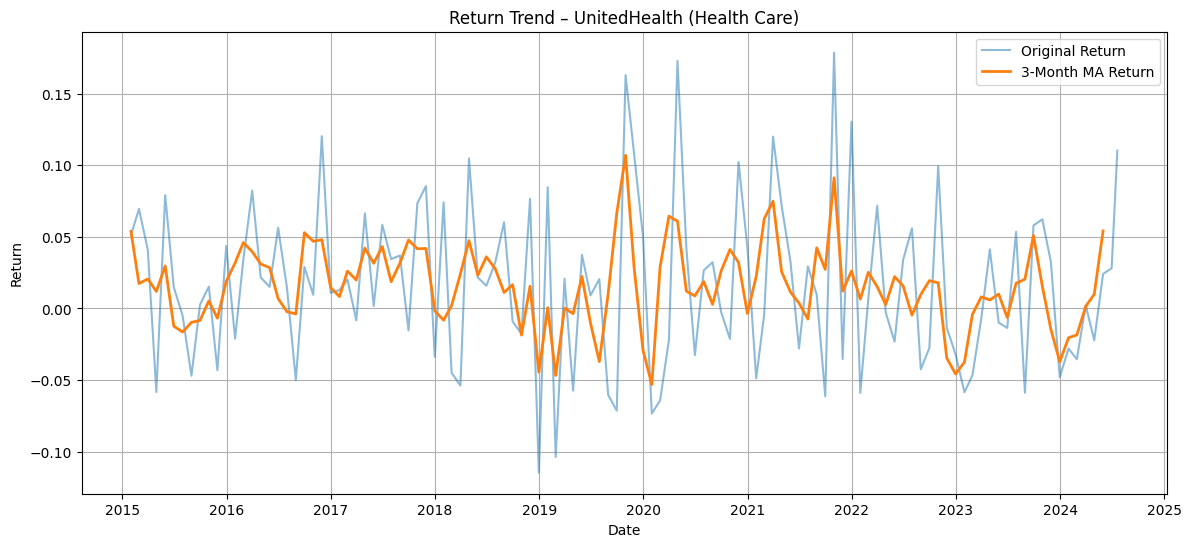

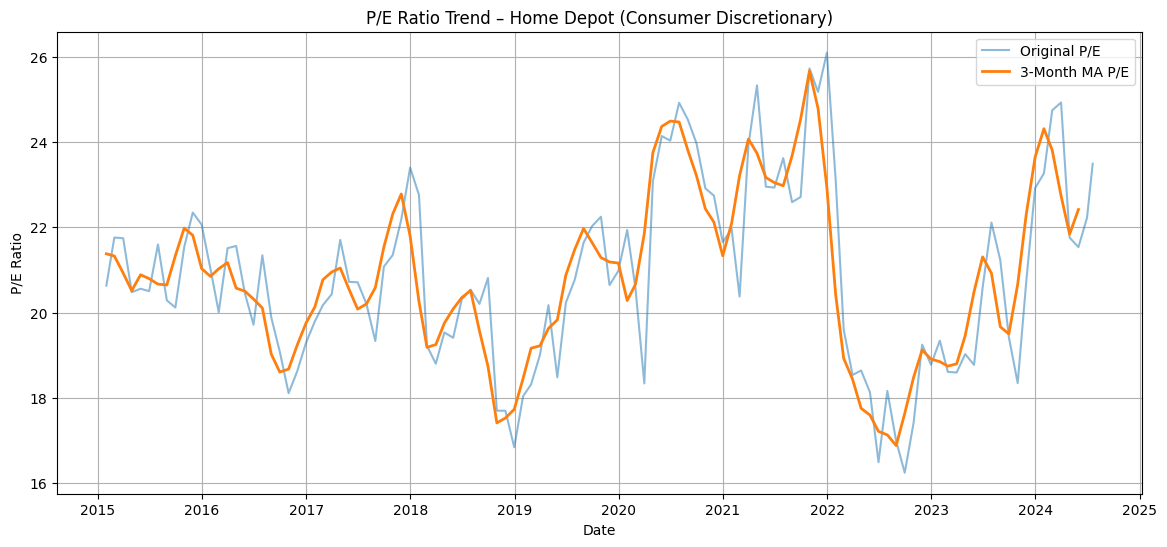

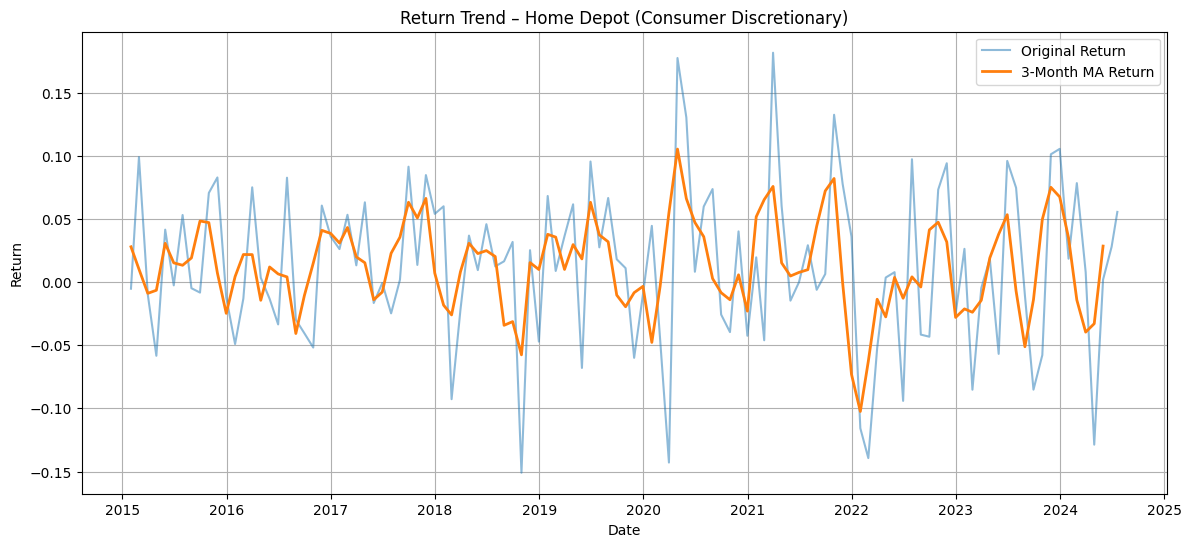

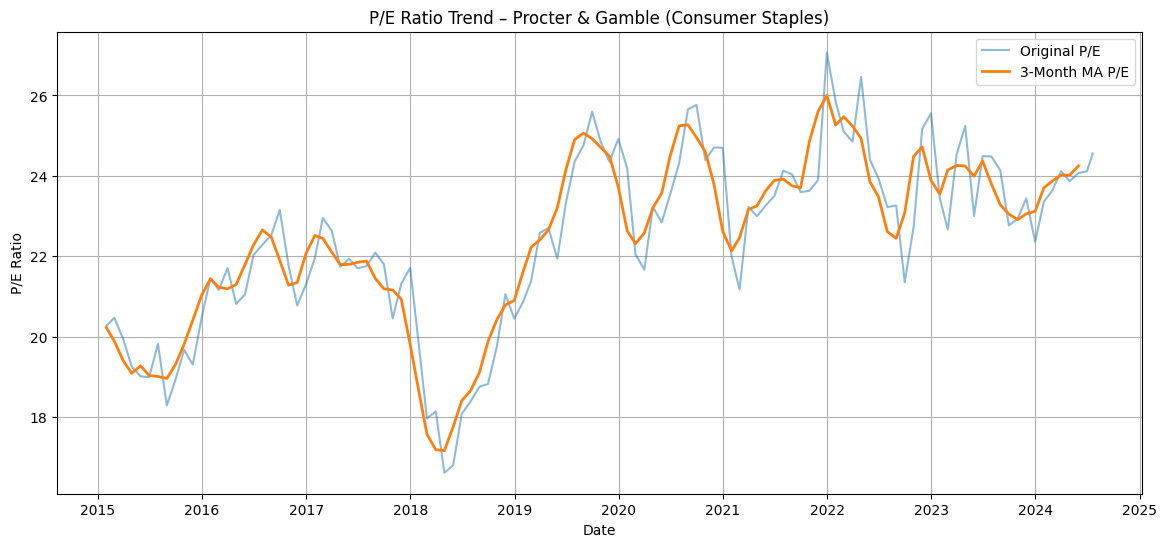

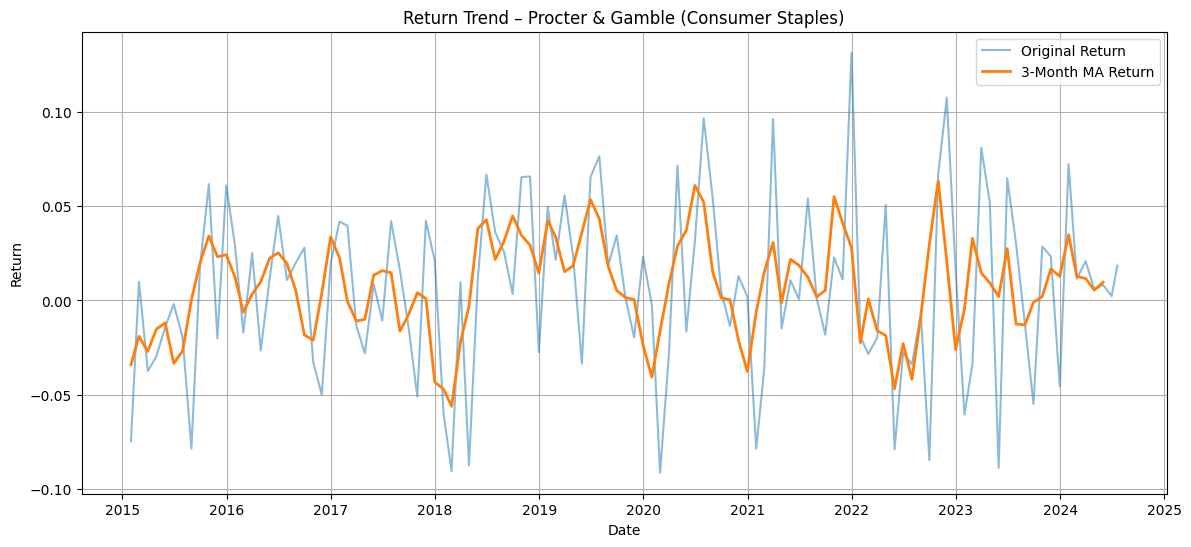

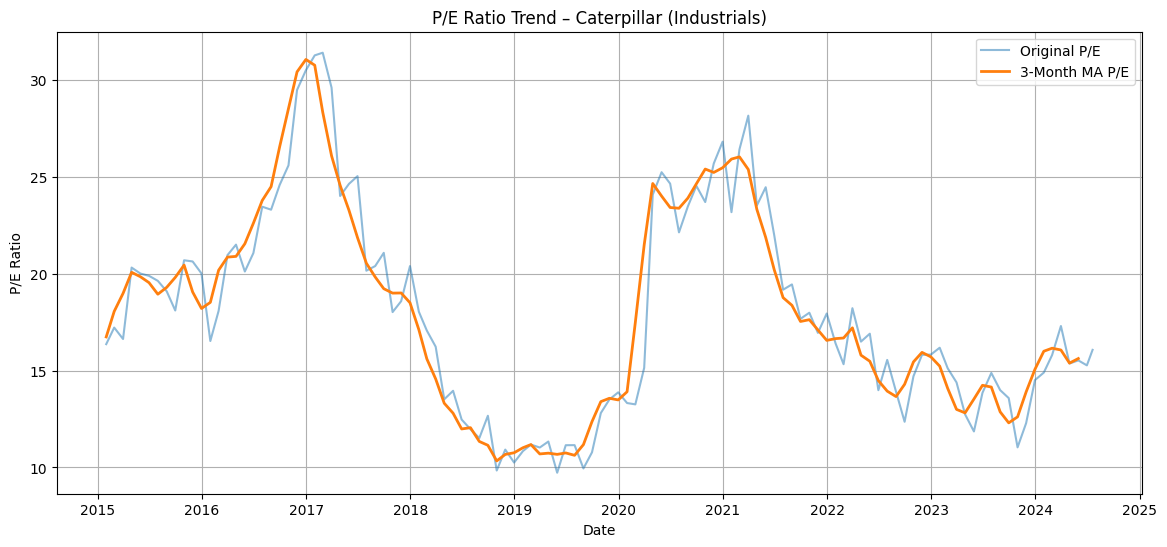

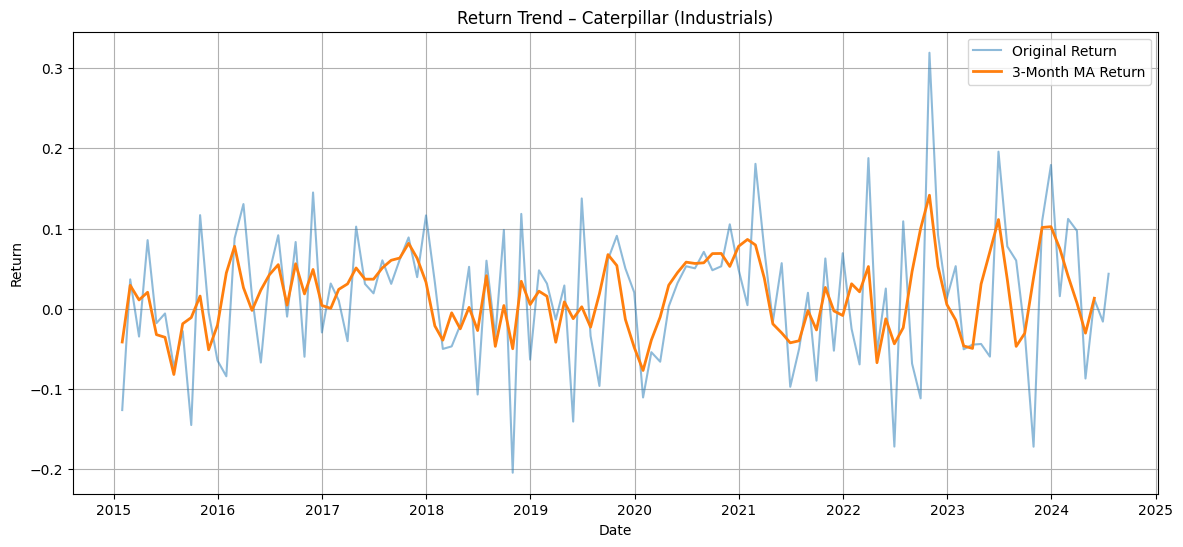

In [14]:
window_size = 3

for stock_code, stock_name in sector_leaders.items():
    # filter by the ticker directly
    company_df = merged_df[merged_df['Stock'] == stock_code].set_index('Date')

    if company_df.empty:
        continue

    # Compute moving averages
    company_df['PE_MA']     = company_df['PE_Ratio'].rolling(window=window_size).mean()
    company_df['Return_MA'] = company_df['Return'].rolling(window=window_size).mean()

    # Plot P/E
    plt.figure(figsize=(14,6))
    plt.plot(company_df.index, company_df['PE_Ratio'], label='Original P/E', alpha=0.5)
    plt.plot(company_df.index, company_df['PE_MA'],     label=f'{window_size}-Month MA P/E', linewidth=2)
    plt.title(f"P/E Ratio Trend – {stock_name}")
    plt.xlabel("Date")
    plt.ylabel("P/E Ratio")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Return
    plt.figure(figsize=(14,6))
    plt.plot(company_df.index, company_df['Return'],    label='Original Return', alpha=0.5)
    plt.plot(company_df.index, company_df['Return_MA'], label=f'{window_size}-Month MA Return', linewidth=2)
    plt.title(f"Return Trend – {stock_name}")
    plt.xlabel("Date")
    plt.ylabel("Return")
    plt.legend()
    plt.grid(True)
    plt.show()
